In [9]:
# Редакционное расстояние между строками 
# Сколько типографических ошибок надо совершить минимально в первом слове чтобы получить второе
# 1) перепутали символ 2) вставили лишний 3) потеряли нужный
# O(N*M), N=len(word_1), M=len(word_2)

def levenshtein_distance(word_1:str, word_2:str):
    grid = [[i + j if j*i == 0 else 0 for j in range(len(word_2) + 1)] for i in range(len(word_1) + 1)]
    
    for i in range(1, len(word_1) + 1):
        for j in range(1, len(word_2) + 1):
            
            if word_1[i - 1] == word_2[j - 1]:
                grid[i][j] = grid[i - 1][j - 1]
                
            else:
                grid[i][j] = 1 + min(grid[i - 1][j], grid[i][j - 1], grid[i - 1][j - 1])
                
    return grid[len(word_1)][len(word_2)]

# Example:
levenshtein_distance("ABCDEFGH", "ACDEXGIH")

3

In [16]:
# Проверка равенства строк. O(N), N = len(word_1)
def equal_words(word_1, word_2):
    if len(word_1) != len(word_2):
        return False
    for i in range(len(word_1)):
        if word_1[i] != word_2[i]:
            return False
    return True

# Example:
print(equal_words("stroka", "straka"))
print(equal_words("stroka", "stroka"))

False
True


In [30]:
# Наивный поиск подстроки в строке. O(N*M), N = len(word), M = len(sub_word)
def naive_search_substring(word, sub_word):
    for idx in range(len(word) - len(sub_word) + 1):
        if equal_words(word[idx:len(sub_word) + idx], sub_word):
            print(idx)
            
# Example:
naive_search_substring("vabacfabacabachabacjabac",'abac')

1
6
10
15
20


In [31]:
naive_search_substring("ababbac","bac")

4


При поска подстроки в геноме, длина самого гена и подстроки может быть огромной, а наивный алгоритм имеет сложность $O(N*M$), поэтому нужно как-то предобработать строку  для того чтобы облегчить поиск подстроки 

In [19]:
# префикс функция от строки - длина max собственного суфикса который является - префиксом 
# собственный суфикс - суфикс != строке

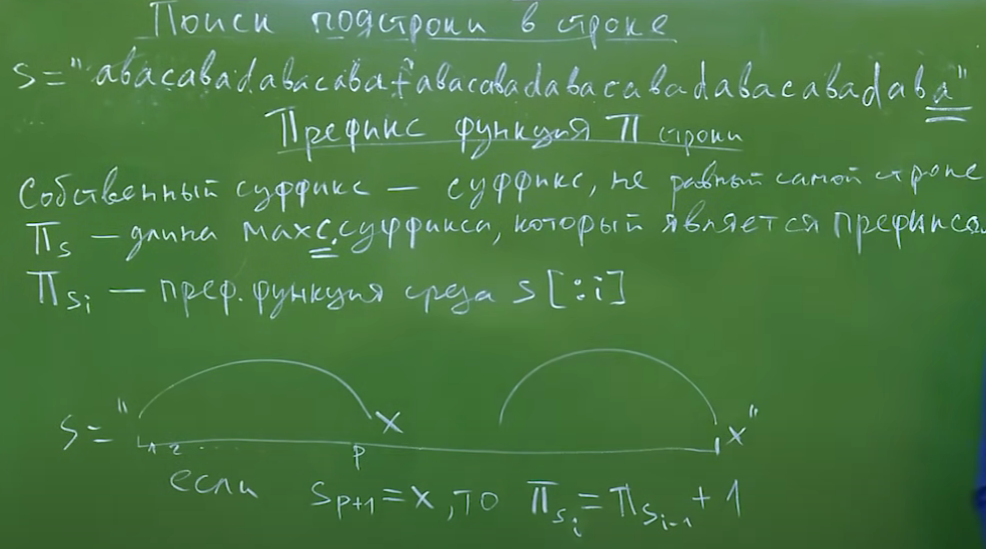

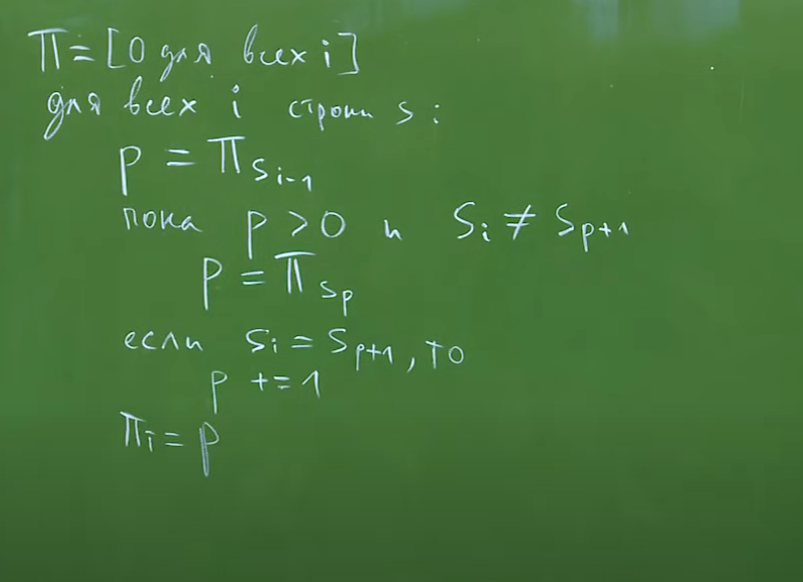

##  Поиск подстроки. Алгоритм Кнута–Морриса-Пратта

Примитивный алгоритм поиска подстроки в строке основан на переборе всех подстрок, длина которых равна длине шаблона поиска, и посимвольном сравнении таких подстрок с шаблоном поиска.  По традиции шаблон поиска или образец принято обозначать как needle (англ. «иголка»), а строку, в которой ведётся поиск — как haystack (англ. «стог сена»). На языке Python примитивный алгоритм выглядит так:


Обозначим n=|haystack|, m=|needle|. Простейший алгоритм поиска даже в лучшем случае проводит n–m+1 сравнений; если же есть много частичных совпадений, скорость снижается до O(n*m).

Рассматриваемый далее алгоритм хотя и имеет невысокую скорость на «хороших» данных, но это компенсируется отсутствием регрессии на «плохих». Алгоритм Кнута-Морриса-Пратта является одним из первых алгоритмов с линейной оценкой в худшем случае. Прежде чем перейти к описанию алгоритма, необходимо рассмотреть понятие префикс-функции.

Префикс-функция строки π(S,i) – это длина наибольшего префикса строки S[1..i], который не совпадает с этой строкой и одновременно является ее суффиксом. Проще говоря, это длина наиболее длинного начала строки, являющегося также и ее концом. Для строки S удобно представлять префикс функцию в виде вектора длиной |S|-1. Можно рассматривать префикс-функцию длины |S|, положив π(S,1)=0. Пример префикс функции для строки «abcdabcabcdabcdab»:

Предположим, что π(S,i)=k. Отметим следующие свойства префикс-функции.
1. Если S[i+1]=S[k+1], то π(S,i+1)=k+1.
2. S[1..π(S,k)] является суффиксом строки S[1..i]. Действительно, если строка S[1..i] оканчивается строкой S[1… π(S,i)]=S[1..k], а строка S[1..k] оканчивается строкой S[1..π(S,k)], то и строка S[1..i] оканчивается строкой S[1..π(S,k)].
3. ∀ j∈(k,i), S[1..j] не является суффиксом строки S[1..i]. В противном случае было бы неверным предположение π(S,i)=k, так как j>k.

Рассмотренные свойства позволяют получить алгоритм вычисления префикс-функции.
Пусть π(S,i)=k. Необходимо вычислить π(S,i+1).
 1. Если S[i+1]=S[k+1], то π(S,i+1)=k+1.
 2. Иначе, если k=0, то π(S,i+1)=0.
 3. Иначе положить k:=π(S,k) и перейти к шагу 1

Ключевым моментом для понимания сути алгоритма является тот факт, что если найденный на предыдущем шаге суффикс не может быть расширен на следующую позицию, то мы пытаемся рассматривать меньшие суффиксы до тех пор, пока это возможно.

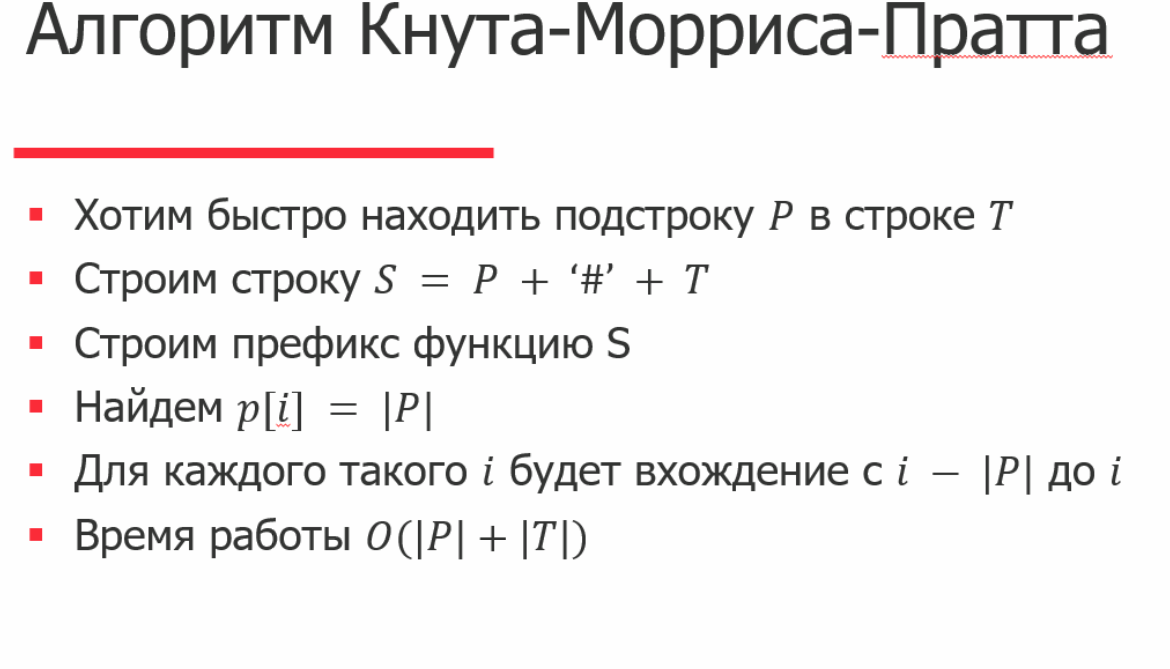

In [85]:
# Алгоритм Кнута-Морриса-Пратта, O(N+M)

def prefix(word):
    pi = [0 for _ in range(len(word))]
    for i in range(1, len(word)):
        k = pi[i-1]
        while k > 0 and word[k] !=  word[i]:
            k = pi[k-1]
        if word[k] == word[i]:
            k = k + 1
        pi[i] = k
    return pi

def kmp(word, sub_word):
    """
    return the list of tuples, tuple: (start_index, end_index)
    """
    word_prime = sub_word + "#" + word
    pi = prefix(word_prime)
    result = []
    for i in range(len(sub_word) + 1, len(word_prime)):
        if pi[i] == len(sub_word):
            result.append((i-2*len(sub_word), i-len(sub_word)-1))
            
    return result

In [86]:
kmp("abcdkabcdkabcdik", "abcdk")

[(0, 4), (5, 9)]